In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
dataset_path = r'C:\Users\jv028u\OneDrive - Linde Group\Desktop\stats and ML\Projects\RSCCASN.csv'

In [3]:
sales_data = pd.read_csv(dataset_path,  parse_dates=True, index_col='DATE')

In [4]:
sales_data.columns

Index(['RSCCASN'], dtype='object')

In [5]:
sales_data

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
sales_data.columns = ['Sales']

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [8]:
sales_data.describe()

,Sales
count,334.000000
mean,16325.095808
std,5369.839014
min,6938.000000
25%,12298.500000
50%,15878.500000
75%,19772.500000
max,34706.000000


In [9]:
sales_data.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [10]:
len(sales_data)-18

316

In [11]:
test_size=18
test_index=len(sales_data)-test_size

In [16]:
train=sales_data.iloc[:test_index]
test=sales_data.iloc[test_index:]

In [17]:
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [22]:
length=12

In [24]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [25]:
X, y = generator[0]

In [26]:
n_features = 1

In [28]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [36]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0030 - val_loss: 0.0064
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018 - val_loss: 0.0063
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0019 - val_loss: 0.0025


In [37]:
losses=pd.DataFrame(model.history.history)

In [38]:
losses

,loss,val_loss
0,0.003332,0.006386
1,0.001692,0.001297
2,0.001558,0.006320
3,0.001724,0.002525


<Axes: >

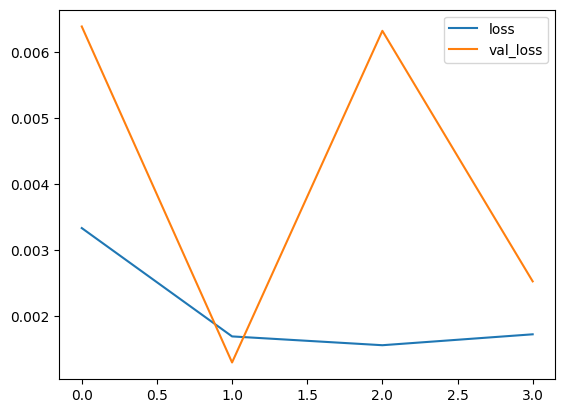

In [39]:
losses.plot()

In [87]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)
# print(current_batch)
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    # print(current_pred)
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [88]:
true_prediction = scaler.inverse_transform(test_predictions)

In [89]:
test['Predictions'] =true_prediction

C:\Users\jv028u\AppData\Local\Temp\ipykernel_24588\2524130582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] =true_prediction


In [90]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22404.803498
2018-06-01,21589,21356.012340
2018-07-01,21919,21614.862190
2018-08-01,23381,23391.222919
2018-09-01,20260,21031.597548
2018-10-01,21473,21665.352580
2018-11-01,25831,25434.617624
2018-12-01,34706,35851.502161
2019-01-01,16410,17437.442415


<Axes: xlabel='DATE'>

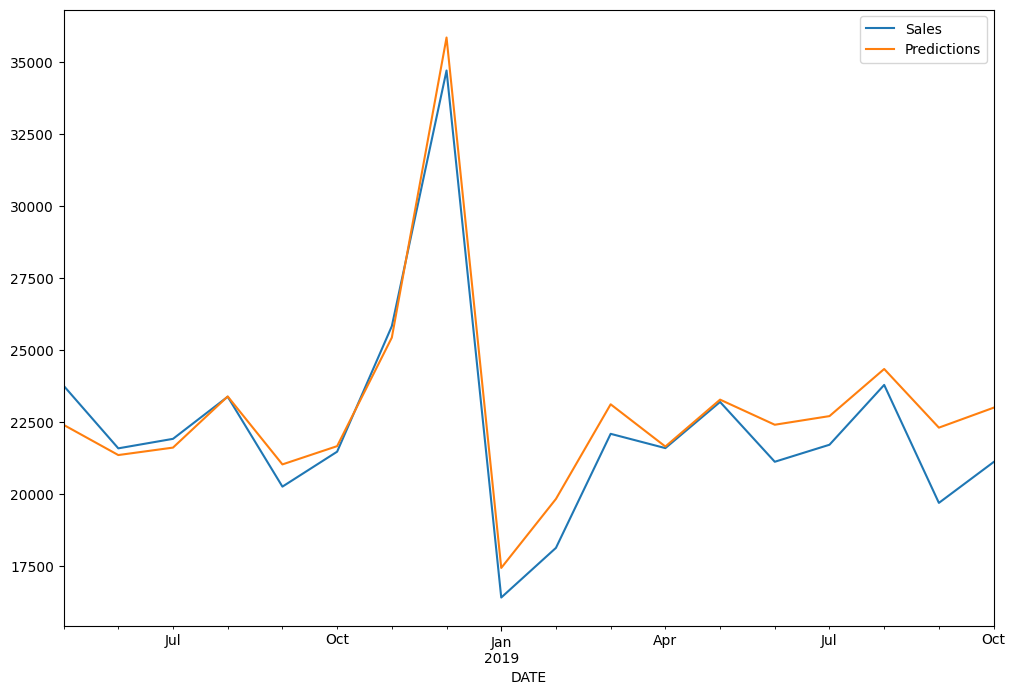

In [91]:
test.plot(figsize=(12, 8))

In [92]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(sales_data)

In [93]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length=length, batch_size=1)

In [94]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=8)


Epoch 1/8


C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 21/322 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0721

C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0330
Epoch 2/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0148
Epoch 3/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0148
Epoch 4/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0089
Epoch 5/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0025
Epoch 6/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0023
Epoch 7/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0013
Epoch 8/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0010   


In [ ]:
forecast=[]
periods=12
first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

